In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install opencv-python tensorflow keras deepface numpy matplotlib imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=2d5d4236ac25b0d0bab385a59487d9627194a4925b741fcfffaab2a0b8b452f5
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [ ]:
#loading and preprocessing.
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Set path to only "mask" images
mask_path = "/content/drive/MyDrive/With Mask"

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=0.2  # Splitting data for training and validation
)

# Load train data (only mask images)
train_data = datagen.flow_from_directory(
    mask_path,   # Only mask images
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # No labels needed
    subset="training"
)

# Load validation data (only mask images)
val_data = datagen.flow_from_directory(
    mask_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    subset="validation"
)

print("Mask data loaded successfully!")


Found 577 images belonging to 5 classes.
Found 142 images belonging to 5 classes.
Mask data loaded successfully!


In [ ]:

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Set path to only "without_mask" images
without_mask_path = "/content/drive/MyDrive/Without Mask"

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=0.2  # Splitting data for training and validation
)

# Load train data (only without mask images)
train_data = datagen.flow_from_directory(
    without_mask_path,  # Only unmasked images
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # No labels needed since we are training only one class
    subset="training"
)

# Load validation data (only without mask images)
val_data = datagen.flow_from_directory(
    without_mask_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    subset="validation"
)

print("Without mask data loaded successfully!")



Found 443 images belonging to 4 classes.
Found 108 images belonging to 4 classes.
Without mask data loaded successfully!


In [ ]:
#training and saving the trained dataset.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Ensure the dataset is loaded properly
data_gen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_data = data_gen.flow_from_directory(
    "/content/drive/MyDrive/With Mask",  # Replace with your dataset path
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val_data = data_gen.flow_from_directory(
    "/content/drive/MyDrive/With Mask",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

# ✅ Define the Model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # Binary classification (Masked/Unmasked)
])

# ✅ Compile & Train the Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(train_data, validation_data=val_data, epochs=10)

# ✅ Now, Save the Model
model.save("mask_detector_model.h5")
print("✅ Model saved successfully as 'mask_detector_model.h5'!")


Found 577 images belonging to 5 classes.
Found 142 images belonging to 5 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 305s 16s/step - accuracy: 0.2115 - loss: -804.5516 - val_accuracy: 0.1972 - val_loss: -3220.8542
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.1938 - loss: -4497.8853 - val_accuracy: 0.1972 - val_loss: -7597.3027
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.1788 - loss: -10432.9092 - val_accuracy: 0.1972 - val_loss: -13456.9756
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.1973 - loss: -16695.3145 - val_accuracy: 0.1972 - val_loss: -20855.3223
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.2086 - loss: -24360.9238 - val_accuracy: 0.1972 - val_loss: -29879.7402
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.2063 - loss: -36541.3906 - val_accuracy: 0.1972 - val_loss: -40969.6484
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.2115 - loss: -44890.8867 - val_accuracy: 0.1972 - val_loss: -53886.1562
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step -

✅ Model saved successfully as 'mask_detector_model.h5'!


In [ ]:

train_data_combined = data_gen.flow_from_directory(
    "/content/drive/MyDrive/Without Mask",  # Parent folder with both categories
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val_data_combined = data_gen.flow_from_directory(
    "/content/drive/MyDrive/Without Mask",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

# Train a single model for both categories
model_combined = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

# Compile & Train
model_combined.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model_combined.fit(train_data_combined, validation_data=val_data_combined, epochs=10)

# Save the combined model
model_combined.save("mask_classification_model.h5")
print("✅ Combined model saved as 'mask_classification_model.h5'!")


Found 443 images belonging to 4 classes.
Found 108 images belonging to 4 classes.
Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 218s 15s/step - accuracy: 0.3150 - loss: -373.3657 - val_accuracy: 0.2222 - val_loss: -1698.2755
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.3288 - loss: -2190.4424 - val_accuracy: 0.2870 - val_loss: -3857.1455
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3829 - loss: -4576.8354 - val_accuracy: 0.2407 - val_loss: -6637.7949
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.3764 - loss: -7636.3442 - val_accuracy: 0.2222 - val_loss: -10092.0361
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.3362 - loss: -11240.4902 - val_accuracy: 0.2407 - val_loss: -14312.9082
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.4059 - loss: -14936.8770 - val_accuracy: 0.2407 - val_loss: -19251.2891
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.4350 - loss: -19057.4355 - val_accuracy: 0.2

✅ Combined model saved as 'mask_classification_model.h5'!


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import os
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
!pip install facenet-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 877.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16

In [ ]:
!pip install --upgrade facenet-pytorch


  0%|          | 0.00/107M [00:00<?, ?B/s]

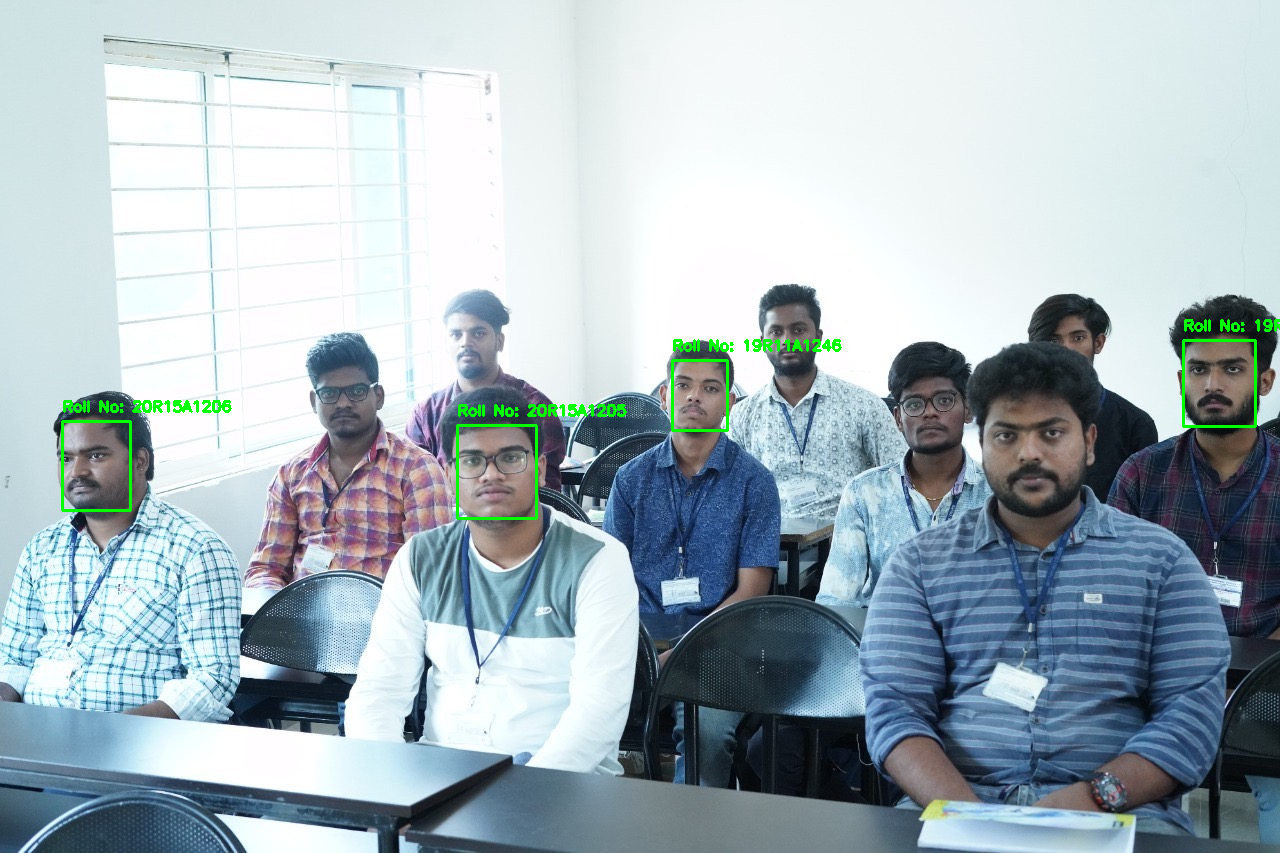

✅ Attendance saved to attendance.xlsx


In [ ]:
import os
import numpy as np
import cv2
import torch
import pandas as pd
from PIL import Image
from facenet_pytorch import MTCNN, InceptionResnetV1
from sklearn.metrics.pairwise import cosine_similarity
from google.colab.patches import cv2_imshow  # Fix for Colab

# Initialize MTCNN for face detection
mtcnn = MTCNN(image_size=160, margin=20, keep_all=True)

# Initialize FaceNet model
facenet = InceptionResnetV1(pretrained='vggface2').eval()

# Paths for known images
known_faces = {
    "20R15A1206": "/content/drive/MyDrive/Without Mask/20R15A1206/0001.jpg",
    "20R15A1205": "/content/drive/MyDrive/Without Mask/20R15A1205/ezgif-frame-001.jpg",
    "19R11A1246": "/content/drive/MyDrive/Without Mask/19R11A1246/0083.jpg",
    "19R11A1241": "/content/drive/MyDrive/Without Mask/19R11A1241/0001.jpg",
}

# Store known embeddings
known_embeddings = {}

def extract_embedding(img_path):
    """Extracts FaceNet embedding for a given image."""
    try:
        img = Image.open(img_path)
        face = mtcnn(img)
        if face is not None:
            face_tensor = face.clone().detach().squeeze(0).to(torch.float32)
            with torch.no_grad():
                embedding = facenet(face_tensor.unsqueeze(0)).cpu().numpy().flatten()
            return embedding / np.linalg.norm(embedding)  # Normalize embedding
    except Exception as e:
        print(f"❌ Error processing {img_path}: {e}")
    return None

# Compute embeddings for known faces
for roll_number, img_path in known_faces.items():
    embedding = extract_embedding(img_path)
    if embedding is not None:
        known_embeddings[roll_number] = embedding

def detect_and_mark_attendance(input_img_path, threshold=0.7, output_excel="attendance.xlsx"):
    """Detects faces in input image, ensures unique matches, marks attendance, and updates an Excel file."""
    img = cv2.imread(input_img_path)
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    # Detect faces & get bounding boxes
    boxes, _ = mtcnn.detect(img_pil)
    faces = mtcnn(img_pil)

    detected_roll_numbers = {}

    if faces is None or boxes is None:
        print("❌ No face detected!")
    else:
        assigned_matches = set()

        for box, face in zip(boxes, faces):
            if face is None or box is None or len(box) != 4:
                continue

            face_tensor = face.clone().detach().squeeze(0).to(torch.float32)
            with torch.no_grad():
                input_embedding = facenet(face_tensor.unsqueeze(0)).cpu().numpy().flatten()
                input_embedding = input_embedding / np.linalg.norm(input_embedding)  # Normalize embedding

            best_match = None
            best_similarity = 0.0

            # Find best unique match
            for roll_number, known_embedding in known_embeddings.items():
                if roll_number in assigned_matches:
                    continue  # Skip already assigned roll numbers

                similarity = cosine_similarity([input_embedding], [known_embedding])[0][0]
                if similarity > best_similarity:
                    best_similarity = similarity
                    best_match = roll_number if similarity >= threshold else None  # Set None for unknowns

            # Assign match if unique
            if best_match is not None:
                assigned_matches.add(best_match)
                detected_roll_numbers[best_match] = "Absent"  # Mark all detected as absent

                # Draw bounding box and label **only for known people**
                x1, y1, x2, y2 = map(int, box)
                color = (0, 255, 0)  # Green for all faces
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                cv2.putText(img, f"Roll No: {best_match}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Show image in Colab
    cv2_imshow(img)  # Fix for Google Colab

    # Prepare attendance data
    attendance_data = {roll_no: detected_roll_numbers.get(roll_no, "Absent") for roll_no in known_faces.keys()}
    df = pd.DataFrame(list(attendance_data.items()), columns=["Roll Number", "Attendance"])

    # Save to Excel
    df.to_excel(output_excel, index=False)
    print(f"✅ Attendance saved to {output_excel}")

# Example usage
detect_and_mark_attendance("/content/withoutmask.jpg")


❌ Error processing /content/drive/MyDrive/With Mask/19R11A1215/0001.jpg: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 2, 3, 160, 160]


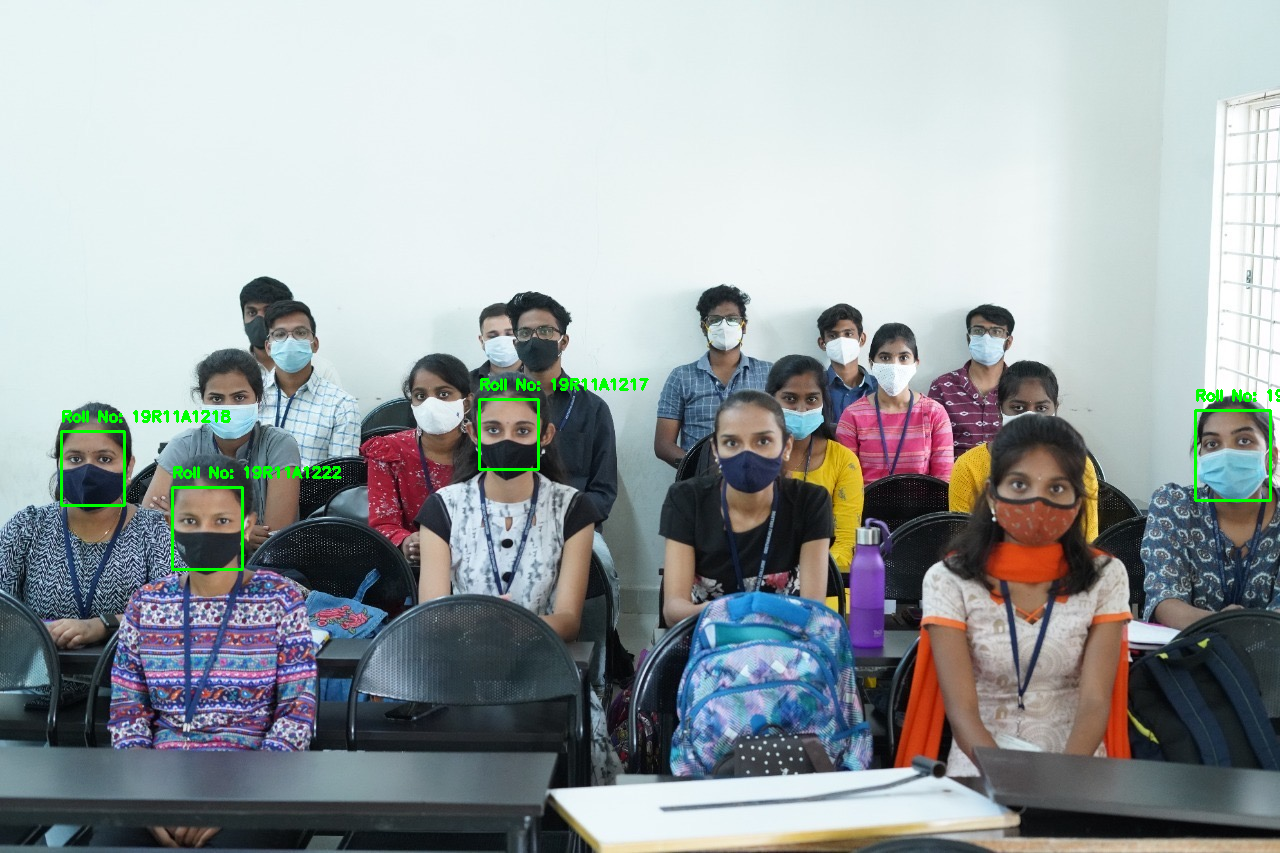

✅ Attendance saved to attendance.xlsx


In [ ]:
import os
import numpy as np
import cv2
import torch
import pandas as pd
from PIL import Image
from facenet_pytorch import MTCNN, InceptionResnetV1
from sklearn.metrics.pairwise import cosine_similarity
from google.colab.patches import cv2_imshow  # Fix for Colab

# Initialize MTCNN for face detection
mtcnn = MTCNN(image_size=160, margin=20, keep_all=True)

# Initialize FaceNet model
facenet = InceptionResnetV1(pretrained='vggface2').eval()

# Paths for known images
known_faces = {
    "19R11A1208": "/content/drive/MyDrive/With Mask/19R11A1208/0001.jpg",
    "19R11A1215": "/content/drive/MyDrive/With Mask/19R11A1215/0001.jpg",
    "19R11A1217": "/content/drive/MyDrive/With Mask/19R11A1217/0001.jpg",
    "19R11A1218": "/content/drive/MyDrive/With Mask/19R11A1218/0001.jpg",
    "19R11A1222": "/content/drive/MyDrive/With Mask/19R11A1222/0091.jpg",
}

# Store known embeddings
known_embeddings = {}

def extract_embedding(img_path):
    """Extracts FaceNet embedding for a given image."""
    try:
        img = Image.open(img_path)
        face = mtcnn(img)
        if face is not None:
            face_tensor = face.clone().detach().squeeze(0).to(torch.float32)
            with torch.no_grad():
                embedding = facenet(face_tensor.unsqueeze(0)).cpu().numpy().flatten()
            return embedding / np.linalg.norm(embedding)  # Normalize embedding
    except Exception as e:
        print(f"❌ Error processing {img_path}: {e}")
    return None

# Compute embeddings for known faces
for roll_number, img_path in known_faces.items():
    embedding = extract_embedding(img_path)
    if embedding is not None:
        known_embeddings[roll_number] = embedding

def detect_and_mark_attendance(input_img_path, threshold=0.7, output_excel="attendance.xlsx"):
    """Detects faces in input image, ensures unique matches, marks attendance only for detected faces, and updates an Excel file."""
    img = cv2.imread(input_img_path)
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    # Detect faces & get bounding boxes
    boxes, _ = mtcnn.detect(img_pil)
    faces = mtcnn(img_pil)

    detected_roll_numbers = {}

    if faces is None or boxes is None:
        print("❌ No face detected!")
    else:
        assigned_matches = set()

        for box, face in zip(boxes, faces):
            if face is None or box is None or len(box) != 4:
                continue

            face_tensor = face.clone().detach().squeeze(0).to(torch.float32)
            with torch.no_grad():
                input_embedding = facenet(face_tensor.unsqueeze(0)).cpu().numpy().flatten()
                input_embedding = input_embedding / np.linalg.norm(input_embedding)  # Normalize embedding

            best_match = None
            best_similarity = 0.0

            # Find best unique match
            for roll_number, known_embedding in known_embeddings.items():
                if roll_number in assigned_matches:
                    continue  # Skip already assigned roll numbers

                similarity = cosine_similarity([input_embedding], [known_embedding])[0][0]
                if similarity > best_similarity:
                    best_similarity = similarity
                    best_match = roll_number if similarity >= threshold else None  # Set None for unknowns

            # Assign match if unique
            if best_match is not None:
                assigned_matches.add(best_match)
                detected_roll_numbers[best_match] = "Present"  # Mark detected as present

                # Draw bounding box and label **only for known people**
                x1, y1, x2, y2 = map(int, box)
                color = (0, 255, 0)  # Green for all faces
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                cv2.putText(img, f"Roll No: {best_match}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Show image in Colab
    cv2_imshow(img)  # Fix for Google Colab

    # Prepare attendance data
    attendance_data = {roll_no: detected_roll_numbers.get(roll_no, "Absent") for roll_no in known_faces.keys()}
    df = pd.DataFrame(list(attendance_data.items()), columns=["Roll Number", "Attendance"])

    # Save to Excel
    df.to_excel(output_excel, index=False)
    print(f"✅ Attendance saved to {output_excel}")

# Example usage
detect_and_mark_attendance("/content/with_mask.jpg")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# ✅ Data Preprocessing with Augmentation
data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = data_gen.flow_from_directory(
    "/content/drive/MyDrive/With Mask",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val_data = data_gen.flow_from_directory(
    "/content/drive/MyDrive/With Mask",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

# ✅ Compute Class Weights (if dataset is imbalanced)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)
class_weights = dict(enumerate(class_weights))

# ✅ Load EfficientNetB0 with Fine-Tuning
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True

# ✅ Fine-Tune Last 30 Layers
for layer in base_model.layers[:-30]:
    layer.trainable = False

# ✅ Define the Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")  # Binary classification
])

# ✅ Use Cosine Decay Learning Rate
lr_schedule = CosineDecay(initial_learning_rate=0.001, decay_steps=1000, alpha=0.0001)
optimizer = Adam(learning_rate=lr_schedule)

# ✅ Compile Model
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# ✅ Early Stopping to Prevent Overfitting
early_stopping = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)

# ✅ Train Model for More Epochs
history = model.fit(train_data, validation_data=val_data, epochs=30, class_weight=class_weights, callbacks=[early_stopping])

# ✅ Save Model
model.save("mask_detector_model.h5")
print("✅ Model saved successfully!")


Found 577 images belonging to 5 classes.
Found 142 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.1941 - loss: -9.0752 - val_accuracy: 0.1972 - val_loss: -0.6342
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.2043 - loss: -158.6116 - val_accuracy: 0.1972 - val_loss: -1.6667
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.1959 - loss: -1111.0525 - val_accuracy: 0.1972 - val_loss: -172.1845
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.2013 - loss: -3823.1147 - val_accuracy: 0.1972 - val_loss: -900.0953
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.2019 - loss: -10455.6426 - val_accuracy: 0.1972 - val_loss: -15424.9082
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.2213 - loss: -17920.8516 - val_accuracy: 0.1972 - val_loss: -4593.3647


✅ Model saved successfully!
